In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data		       kaggle.json  with_mask_1.jpg
face-mask-dataset.zip  sample_data  without_mask_1044.jpg


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1005.jpg', 'with_mask_2599.jpg', 'with_mask_3593.jpg', 'with_mask_2654.jpg', 'with_mask_1792.jpg']
['with_mask_3241.jpg', 'with_mask_2619.jpg', 'with_mask_2706.jpg', 'with_mask_2925.jpg', 'with_mask_2465.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2453.jpg', 'without_mask_1620.jpg', 'without_mask_1348.jpg', 'without_mask_117.jpg', 'without_mask_7.jpg']
['without_mask_696.jpg', 'without_mask_904.jpg', 'without_mask_107.jpg', 'without_mask_2239.jpg', 'without_mask_3228.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


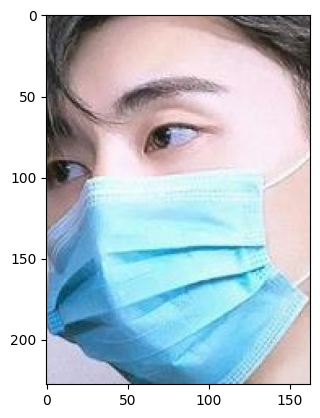

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

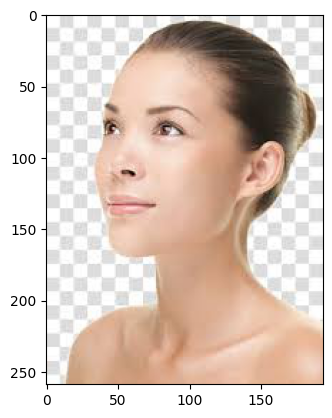

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
data[0]

array([[[ 60,  56,  59],
        [ 43,  42,  45],
        [ 41,  42,  44],
        ...,
        [ 61,  64,  79],
        [ 42,  45,  60],
        [ 48,  51,  66]],

       [[ 64,  59,  63],
        [ 44,  41,  44],
        [ 33,  34,  36],
        ...,
        [ 59,  62,  77],
        [ 46,  49,  64],
        [ 67,  70,  85]],

       [[ 57,  51,  56],
        [ 41,  36,  42],
        [ 35,  35,  39],
        ...,
        [ 56,  59,  74],
        [ 45,  48,  63],
        [ 72,  75,  90]],

       ...,

       [[155, 178, 180],
        [158, 179, 180],
        [160, 181, 182],
        ...,
        [132, 142, 160],
        [164, 166, 179],
        [190, 185, 195]],

       [[157, 180, 182],
        [160, 181, 183],
        [162, 183, 184],
        ...,
        [142, 149, 167],
        [180, 180, 192],
        [199, 192, 200]],

       [[158, 181, 184],
        [162, 182, 185],
        [163, 183, 184],
        ...,
        [170, 176, 193],
        [190, 187, 199],
        [201, 192, 199]]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
X_train[0]

array([[[ 47,  40,  23],
        [ 51,  43,  29],
        [ 54,  48,  36],
        ...,
        [ 56,  48,  27],
        [ 61,  53,  32],
        [ 62,  54,  34]],

       [[ 56,  49,  27],
        [ 57,  50,  31],
        [ 52,  46,  29],
        ...,
        [ 58,  50,  30],
        [ 59,  51,  31],
        [ 59,  50,  32]],

       [[ 61,  55,  29],
        [ 58,  52,  28],
        [ 45,  40,  20],
        ...,
        [ 57,  49,  30],
        [ 54,  46,  27],
        [ 55,  46,  29]],

       ...,

       [[ 52,  40,  24],
        [ 55,  46,  31],
        [107,  99,  88],
        ...,
        [161, 139, 114],
        [140, 116,  95],
        [176, 154, 128]],

       [[ 35,  23,  12],
        [ 82,  72,  60],
        [118, 110,  99],
        ...,
        [151, 129, 104],
        [146, 125, 101],
        [172, 150, 122]],

       [[ 68,  54,  46],
        [116, 103,  94],
        [ 83,  74,  63],
        ...,
        [126, 106,  80],
        [138, 119,  94],
        [145, 125,  97]]

In [ ]:
X_train_scaled[0]

array([[[0.18431373, 0.15686275, 0.09019608],
        [0.2       , 0.16862745, 0.11372549],
        [0.21176471, 0.18823529, 0.14117647],
        ...,
        [0.21960784, 0.18823529, 0.10588235],
        [0.23921569, 0.20784314, 0.1254902 ],
        [0.24313725, 0.21176471, 0.13333333]],

       [[0.21960784, 0.19215686, 0.10588235],
        [0.22352941, 0.19607843, 0.12156863],
        [0.20392157, 0.18039216, 0.11372549],
        ...,
        [0.22745098, 0.19607843, 0.11764706],
        [0.23137255, 0.2       , 0.12156863],
        [0.23137255, 0.19607843, 0.1254902 ]],

       [[0.23921569, 0.21568627, 0.11372549],
        [0.22745098, 0.20392157, 0.10980392],
        [0.17647059, 0.15686275, 0.07843137],
        ...,
        [0.22352941, 0.19215686, 0.11764706],
        [0.21176471, 0.18039216, 0.10588235],
        [0.21568627, 0.18039216, 0.11372549]],

       ...,

       [[0.20392157, 0.15686275, 0.09411765],
        [0.21568627, 0.18039216, 0.12156863],
        [0.41960784, 0

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 6s 21ms/step - loss: 0.4837 - acc: 0.7920 - val_loss: 0.2690 - val_acc: 0.8942
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2973 - acc: 0.8841 - val_loss: 0.2191 - val_acc: 0.9074
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2374 - acc: 0.9047 - val_loss: 0.2212 - val_acc: 0.9091
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2093 - acc: 0.9194 - val_loss: 0.1849 - val_acc: 0.9306
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1664 - acc: 0.9343 - val_loss: 0.1878 - val_acc: 0.9289


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 8ms/step - loss: 0.2239 - acc: 0.9239
Test Accuracy = 0.9238914847373962


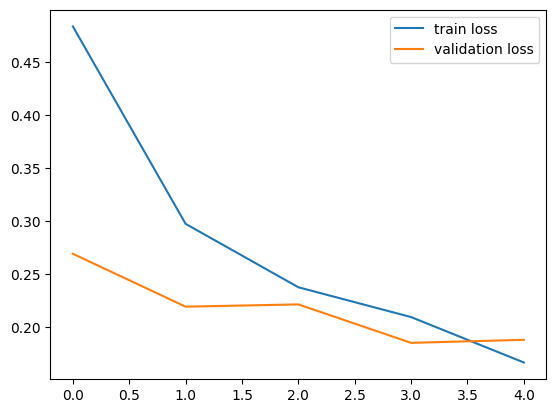

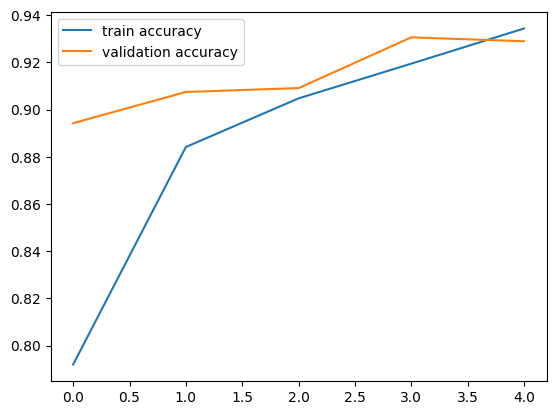

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/with_mask_1.jpg


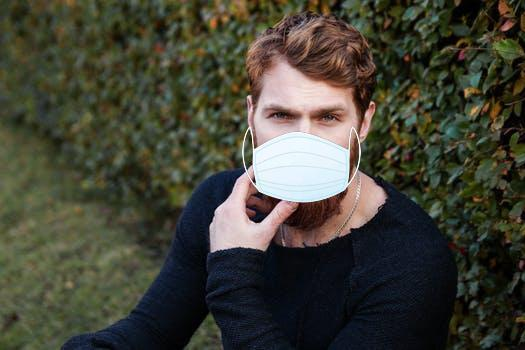

1/1 [==============================] - 0s 31ms/step
[[0.22715503 0.7650243 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')